In [120]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm import tqdm
import math

## Target Function

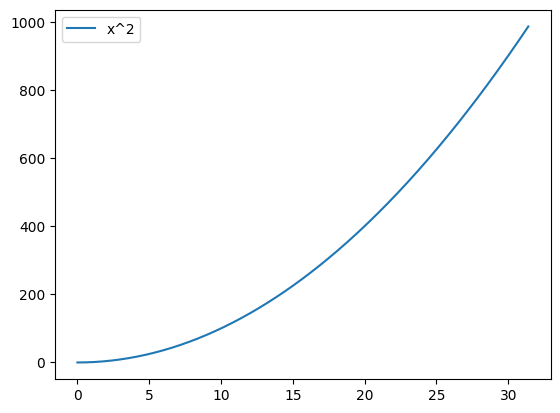

In [129]:
def targetFunc(x):
    """
    Target Funtion for curve fitting
    """
    return x * x

x = np.arange(0, 10 * np.pi, 0.1)
plt.plot(x, [targetFunc(i) for i in x])
plt.legend(["x^2"])

## Dataset

In [122]:
x = np.arange(0, 5 * np.pi, 0.001)
y = [targetFunc(i) for i in x]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=1)

print(f"Training dataset:{X_train.shape}")
print(f"Validation dataset:{X_val.shape}")
print(f"Test dataset:{X_test.shape}")

Training dataset:(10995,)
Validation dataset:(1571,)
Test dataset:(3142,)


## Parameters initialization

In [ ]:
input_dim = 1
hidden_dim = 16
output_dim = 1

W1 = np.random.randn(hidden_dim, input_dim) * np.sqrt(1 / input_dim)
W2 = np.random.randn(output_dim, hidden_dim) * np.sqrt(1 / hidden_dim)
b1 = np.zeros((hidden_dim, 1))
b2 = np.zeros((output_dim, 1))

## Model

In [124]:
cache = {}

def Linear(W, X, b):
    """
    Linear transformation
    """
    return np.matmul(W, X) + b


def relu(X):
    """
    ReLU activation function
    """
    return np.where(X > 0, X, 0)


def forward(x):
    """
    Forward Propagation
    """
    cache['out0'] = x
    x = Linear(W1, x, b1)
    cache['out1'] = x
    x = relu(x)
    cache['out2'] = x
    output = Linear(W2, x, b2)
    cache['out3'] = output
    return output


def loss_fn(y_pred, target):
    """
    MSE loss function
    Args:
        y_pred: predicted value
        target: labels
    """
    loss = np.sum((y_pred - target) * (y_pred - target), axis=1, keepdims=True) / len(y_pred)
    cache['loss'] = (y_pred - target) / len(y_pred)
    return loss


def backward(lr, batch_size):
    """
    Backward propagation
    Args:
        lr: learning rate
        batch_size: batch size
    """
    global W1, W2, b1, b2

    delta2 = 1 / batch_size * cache['loss']
    dW2 = 1 / batch_size * np.matmul(delta2, cache['out2'].T)
    db2 = 1 / batch_size * np.sum(delta2, axis=1, keepdims=True)

    delta1 = np.matmul(W2.T, delta2) * np.where(cache['out1'] > 0, 1, 0)
    dW1 = 1 / batch_size * np.matmul(delta1, cache['out0'].T)
    db1 = 1 / batch_size * np.sum(delta1, axis=1, keepdims=True)

    # Update
    W1 -= lr * dW1
    W2 -= lr * dW2
    b1 -= lr * db1
    b2 -= lr * db2



## Training & Evaluation

In [125]:
def predict(ranger):
    """
    Evaluation function
    Args:
        ranger: List, 2 elements for start number and end number
    """
    x_plot = []
    y_pred = []
    for i in range(ranger[0], ranger[1]):
        x = Linear(W1, np.array([[i]]), b1)
        x = relu(x)
        output = Linear(W2, x, b2)
        x_plot.append(i)
        y_pred.extend(output)

    plt.plot(x_plot, [targetFunc(i) for i in x_plot])
    plt.plot(x_plot, y_pred)
    plt.legend(["Ground truth", "Prediction"])

In [126]:
def train(X, y, epochs=5, batch_size=10, lr=0.001, verbose_ep=100):
    """
    Training funcition
    Args:
        X: input dataset
        y: target label
        batch_size: batch size
        lr: learning rate
        verbose_ep: display loss per verbose_ep epoch
    """
    for epoch in tqdm(range(epochs)):
        rec_loss = 0
        for batch_idx in range(len(X) // batch_size):
            X_batched = np.array([X[batch_idx * batch_size: min((batch_idx + 1) * batch_size, len(X))]])
            y_batched = np.array([y[batch_idx * batch_size: min((batch_idx + 1) * batch_size, len(X))]])
            y_pred = forward(X_batched)
            loss = np.sum(loss_fn(y_pred,np.array(y_batched))) / len(y_pred)
            rec_loss += loss
            backward(lr, batch_size)
        if epoch % verbose_ep == 0:
            print(f"Epoch:{epoch}, Loss:{rec_loss / (len(X) // batch_size)}")

In [127]:
train(X_train, y_train, epochs=5000, batch_size=32, lr=0.01, verbose_ep=1000)

  0%|          | 2/5000 [00:00<10:42,  7.78it/s]

Epoch:0, Loss:23466.144827970125


 20%|██        | 1005/5000 [00:46<02:46, 23.94it/s]

Epoch:1000, Loss:13.972184458886165


 40%|████      | 2004/5000 [01:32<02:16, 21.87it/s]

Epoch:2000, Loss:9.293809155824556


 60%|██████    | 3004/5000 [02:17<01:18, 25.46it/s]

Epoch:3000, Loss:7.094962744732189


 80%|████████  | 4005/5000 [03:02<00:39, 25.01it/s]

Epoch:4000, Loss:6.322901544775074


100%|██████████| 5000/5000 [03:47<00:00, 22.00it/s]


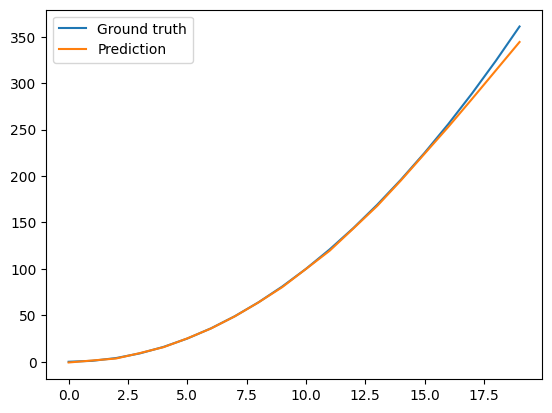

In [128]:
predict([0, 20])